# Data Visualization with Python

Authors: Prof. med. Thomas Ganslandt <Thomas.Ganslandt@medma.uni-heidelberg.de> <br>
and Kim Hee <HeeEun.Kim@medma.uni-heidelberg.de> <br>

Heinrich-Lanz-Center for Digital Health (HLZ) of the Medical Faculty Mannheim <br>
Heidelberg University

This is a part of a tutorial prepared for TMF summer school on 03.07.2019

## Prerequisite: Access the MIMIC Dataset
The MIMIC (Medical Information Mart for Intensive Care) is a freely accessible database containing Intensive Care Unit (ICU) patients. The demo dataset is limited to 100 patients and publicly available as CSV files or as a single Postgres database backup file

>**Instruction to access the MIMIC demo dataset:**
<font size="3">
>1. Create an account on PhysioNet using the following link: https://physionet.org/pnw/login
>2. Navigate to the project page: https://physionet.org/works/MIMICIIIClinicalDatabaseDemo/
>3. Read the Data Use Agreement and click “I agree” to access the data
</font>

<img src="images/er_mimic.png" style="width:100%">

* Database description: https://mimic.physionet.org/gettingstarted/overview/
* Table description: https://mimic.physionet.org/mimictables/admissions/
* ER-Diagram: https://mit-lcp.github.io/mimic-schema-spy/relationships.html

**Agenda**
* <b>Pandas</b>
* </b>Pandas-Profiling</b>
* </b>Missingno</b>
* </b>Wordcloud</b>

## Pandas
http://pandas.pydata.org/pandas-docs/stable/reference/ <br>
Pandas is a Python library for exploring, processing, and model data

## Pandas supports charting a tabular dataset
DataFrame.plot([x, y], **kind**)
> **kind** :
* 'line': line plot (default)
* 'bar': vertical bar plot
* 'barh': horizontal bar plot
* 'hist': histogram
* 'box': boxplot
* 'kde': Kernel Density Estimation plot
* 'density': same as 'kde'
* 'area': stacked area plot
* 'pie': pie plot
* 'scatter': scatter plot
* 'hexbin': Hexagonal binning plot 


<img src="images/DataVisualisation.jpeg" style="height: 1000px;"/>

### Visualize the admission table

In [2]:
import pandas as pd
pd.set_option('display.max_columns', 999)
import pandas.io.sql as psql
# plot a figure directly on Notebook
import matplotlib.pyplot as plt
%matplotlib inline 

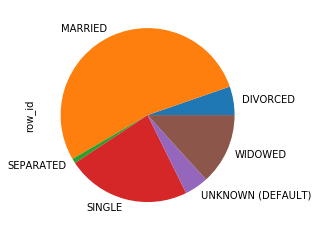

In [3]:
a = pd.read_csv("data/ADMISSIONS.csv")
a.columns = map(str.lower, a.columns)
a.groupby(['marital_status']).count()['row_id'].plot(kind='pie')

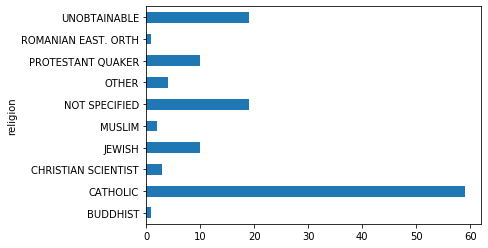

In [4]:
a.groupby(['religion']).count()['row_id'].plot(kind = 'barh') 

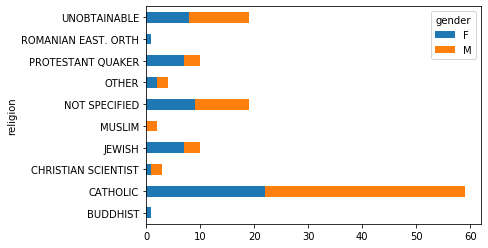

In [5]:
p = pd.read_csv("data/PATIENTS.csv")
p.columns = map(str.lower, p.columns)
ap = pd.merge(a, p, on = 'subject_id' , how = 'inner')
ap.groupby(['religion','gender']).size().unstack().plot(kind="barh", stacked=True)

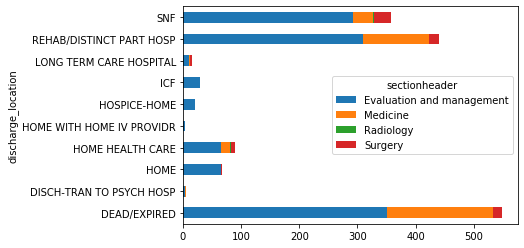

In [6]:
c = pd.read_csv("data/CPTEVENTS.csv")
c.columns = map(str.lower, c.columns)
ac = pd.merge(a, c, on = 'hadm_id' , how = 'inner')
ac.groupby(['discharge_location','sectionheader']).size().unstack().plot(kind="barh", stacked=True)

**Agenda**
* </b>Pandas</b>
* <b>Pandas-Profiling</b>
* </b>Missingno</b>
* </b>Wordcloud</b>

## Pandas-Profiling
https://github.com/pandas-profiling/pandas-profiling <br>
Pandas-Profiling is a Python library for speed up an exploratory data analysis

### Import pandas-profiling (1/3)

In [7]:
# !conda install -c conda-forge pandas-profiling -y
import pandas_profiling

### Load the admissions table (2/3)

In [21]:
a = pd.read_csv("data/ADMISSIONS.csv")
a.columns = map(str.lower, a.columns)
a.head(1)

,row_id,subject_id,hadm_id,admittime,dischtime,deathtime,admission_type,admission_location,discharge_location,insurance,language,religion,marital_status,ethnicity,edregtime,edouttime,diagnosis,hospital_expire_flag,has_chartevents_data
0,12258,10006,142345,2164-10-23 21:09:00,2164-11-01 17:15:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,HOME HEALTH CARE,Medicare,NaN,CATHOLIC,SEPARATED,BLACK/AFRICAN AMERICAN,2164-10-23 16:43:00,2164-10-23 23:00:00,SEPSIS,0,1


### Profile the table (3/3)

In [9]:
pandas_profiling.ProfileReport(a)

Number of variables,19
Number of observations,129
Total Missing (%),9.3%
Total size in memory,19.2 KiB
Average record size in memory,152.6 B
Numeric,2
Categorical,12
Boolean,2
Date,0
Text (Unique),2
Rejected,1


**Agenda**
* </b>Pandas</b>
* </b>Pandas-Profiling</b>
* <b>Missingno</b>
* </b>Wordcloud</b>

## Missingno
https://github.com/ResidentMario/missingno <br>
Missingno offers a visual summary of the completeness of a dataset. This example brings some intuitive thoughts about `ADMISSIONS` table: 
* Not every patient is admitted to the emergency department as there are many missing values in `edregtime` and `edouttime`.
* `language` data of patients is mendatory field, but it used to be not.

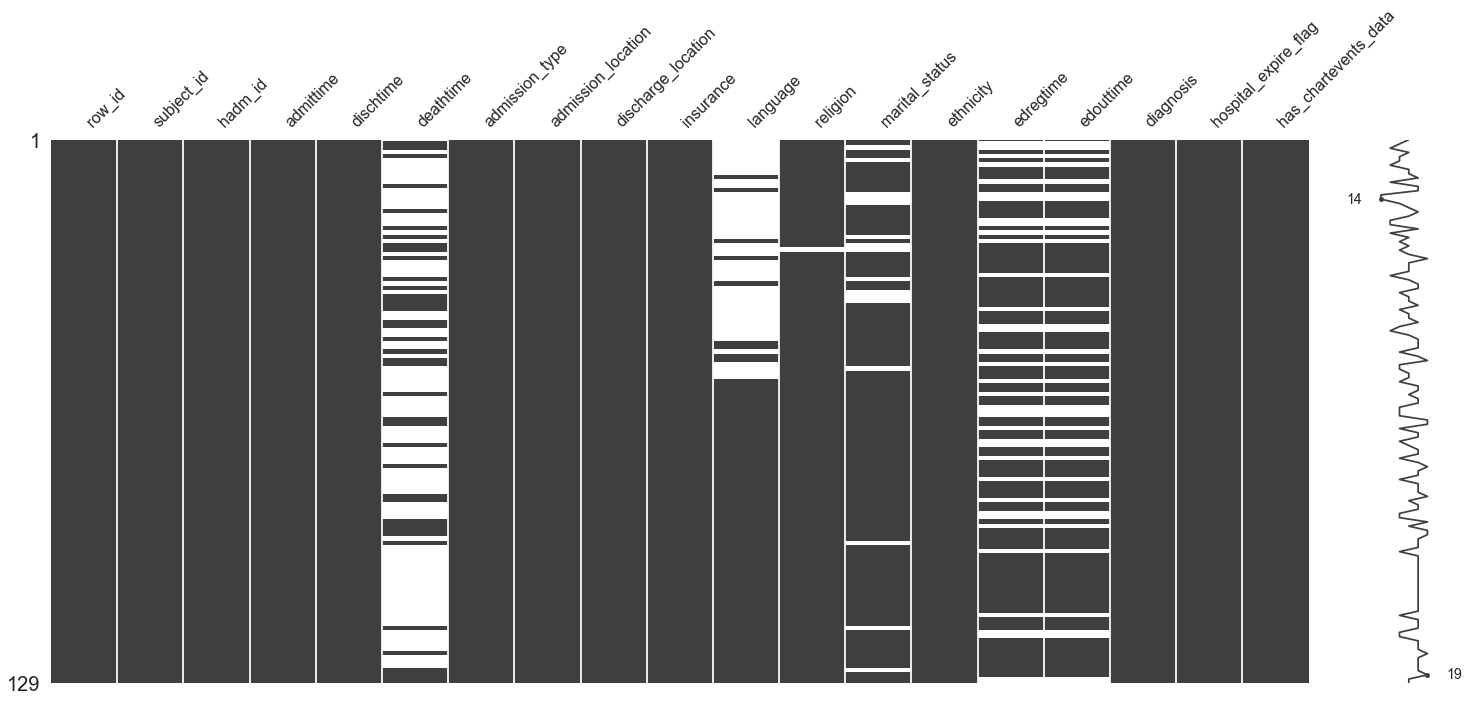

In [22]:
# !conda install -c conda-forge missingno -y
import missingno as msno
msno.matrix(a)

**Agenda**
* </b>Pandas</b>
* </b>Pandas-Profiling</b>
* </b>Missingno</b>
* <b>Wordcloud</b>

## Wordcloud
https://github.com/amueller/word_cloud <br>
Wordcloud visualizes a given text in a word-cloud format <br>
This example illustrates that majority of patients suffered from sepsis

### Import the Wordcloud package (1/4)

In [13]:
# !conda install -c conda-forge wordcloud -y
from wordcloud import WordCloud

### Prepare an input text in string (2/4)

In [14]:
text = str(a['diagnosis'].values)

### Generate a word-cloud from the input text (3/4)

In [15]:
wordcloud = WordCloud().generate(text)

### Plot the word-cloud (4/4)

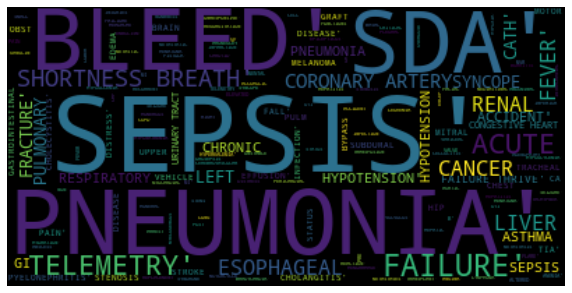

In [16]:
import matplotlib.pyplot as plt
plt.figure(figsize = (10,10))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")
plt.show()

# Question?
Authors: Prof. med. Thomas Ganslandt <Thomas.Ganslandt@medma.uni-heidelberg.de> <br>
and Kim Hee <HeeEun.Kim@medma.uni-heidelberg.de> <br>

Heinrich-Lanz-Center for Digital Health (HLZ) of the Medical Faculty Mannheim <br>
Heidelberg University

This is a part of a tutorial prepared for TMF summer school on 03.07.2019